## Random Forest

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

## 1) Data

#### Feature Description
  * **Survival** - 생존(1), 사망(0)
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)
  * **Name** - 탑승자의 이름
  * **Sex** - 성별. 남자(male), 여자(female)
  * **Age** - 승객 나이
  * **SibSp** - 승객과 함께 탑승한 배우자,형제자매의 수
  * **Parch** - 승객과 함께 탑승한 부모,자식의 수
  * **Ticket** - 티켓명
  * **Fare** - 승차요금
  * **Cabin** - 객실 번호
  * **Embarked** - 탑승한 선착장 장소. C(Cherbourg), Q(Queenstown), S(Southampton)

In [57]:
# Train 데이터
df_raw = pd.read_csv('./train.csv')
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data preprocessing

- 불필요한 Feature 제거

In [58]:
df_raw = df_raw.drop(['PassengerId','Name'], axis=1)
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


- 결측치 처리

In [59]:
#결측치 확인
df_raw.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [60]:
# Cabin 컬럼 제거
df_raw = df_raw.drop('Cabin', axis=1)
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [61]:
# Age 컬럼 결측치는 평균값으로 채우기
np.sort(df_raw['Age'].unique()) 

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [62]:
pd.set_option('display.max_rows', None) # 모든 행을 볼 수 있도록 출력 
df_raw['Age'].value_counts()
pd.set_option('display.max_rows', 100)

In [63]:
df_raw['Age'].fillna(df_raw['Age'].mean(), inplace = True)
#결측치 확인
df_raw.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [64]:
#Embarked --> 최빈값으로 대체 
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
# pd.set_option('display.max_rows',100)
df_raw['Embarked'].fillna('S', inplace=True)
df_raw

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [66]:
df_raw.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [67]:
df_raw

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [68]:
# SibSp, Parch --> FamilySize 로 파생변수 생성
df_raw['FamilySize'] = df_raw['SibSp'] + df_raw['Parch'] + 1  # +1은 자기자신을 더해줌
df_raw = df_raw.drop(['SibSp','Parch'], axis=1)
df_raw.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,male,22.0,A/5 21171,7.2500,S,2
1,1,1,female,38.0,PC 17599,71.2833,C,2
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1
3,1,1,female,35.0,113803,53.1000,S,2
4,0,3,male,35.0,373450,8.0500,S,1


In [69]:
#Ticket
df_raw['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
2683        1
347064      1
350034      1
236853      1
349233      1
Name: Ticket, Length: 681, dtype: int64

In [70]:
df_raw = df_raw.drop(['Ticket'], axis=1)
df_raw

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.000000,7.2500,S,2
1,1,1,female,38.000000,71.2833,C,2
2,1,3,female,26.000000,7.9250,S,1
3,1,1,female,35.000000,53.1000,S,2
4,0,3,male,35.000000,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,1
887,1,1,female,19.000000,30.0000,S,1
888,0,3,female,29.699118,23.4500,S,4
889,1,1,male,26.000000,30.0000,C,1


In [71]:
#Age --> 범주형 변수로 변환(binning)
bins = [0, 20, 40, 60, 80]  # 구간 설정하기 ( 0~20 , 20~40, 40~60, 60~80 )
category_value = [ 'child','young','adult','senior'] # 라벨

df_raw['Age_group'] = pd.cut(df_raw['Age'],
                          bins = bins,
                          labels= category_value,
                          include_lowest = True) #첫번째 구간 왼쪽 수 포함여부
print(df_raw['Age_group'].value_counts())
df_raw

young     562
child     179
adult     128
senior     22
Name: Age_group, dtype: int64


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Age_group
0,0,3,male,22.000000,7.2500,S,2,young
1,1,1,female,38.000000,71.2833,C,2,young
2,1,3,female,26.000000,7.9250,S,1,young
3,1,1,female,35.000000,53.1000,S,2,young
4,0,3,male,35.000000,8.0500,S,1,young
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,1,young
887,1,1,female,19.000000,30.0000,S,1,child
888,0,3,female,29.699118,23.4500,S,4,young
889,1,1,male,26.000000,30.0000,C,1,young


In [72]:
df_raw = df_raw.drop(['Age'], axis=1)
df_raw

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Age_group
0,0,3,male,7.2500,S,2,young
1,1,1,female,71.2833,C,2,young
2,1,3,female,7.9250,S,1,young
3,1,1,female,53.1000,S,2,young
4,0,3,male,8.0500,S,1,young
...,...,...,...,...,...,...,...
886,0,2,male,13.0000,S,1,young
887,1,1,female,30.0000,S,1,child
888,0,3,female,23.4500,S,4,young
889,1,1,male,30.0000,C,1,young


 - Encoding

In [73]:
# One-hot Encoding
# Embarked 더미변수화 
df_raw_dummy = pd.get_dummies(df_raw, columns=['Embarked'])
df_raw_dummy 

,Survived,Pclass,Sex,Fare,FamilySize,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,7.2500,2,young,0,0,1
1,1,1,female,71.2833,2,young,1,0,0
2,1,3,female,7.9250,1,young,0,0,1
3,1,1,female,53.1000,2,young,0,0,1
4,0,3,male,8.0500,1,young,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,1,young,0,0,1
887,1,1,female,30.0000,1,child,0,0,1
888,0,3,female,23.4500,4,young,0,0,1
889,1,1,male,30.0000,1,young,1,0,0


In [74]:
# Label encoding
encoding = LabelEncoder()
encoding.fit(df_raw_dummy['Sex'])

df_raw_dummy['Sex'] = encoding.transform(df_raw_dummy['Sex'])

print(encoding.classes_)
df_raw_dummy

['female' 'male']


,Survived,Pclass,Sex,Fare,FamilySize,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,2,young,0,0,1
1,1,1,0,71.2833,2,young,1,0,0
2,1,3,0,7.9250,1,young,0,0,1
3,1,1,0,53.1000,2,young,0,0,1
4,0,3,1,8.0500,1,young,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,13.0000,1,young,0,0,1
887,1,1,0,30.0000,1,child,0,0,1
888,0,3,0,23.4500,4,young,0,0,1
889,1,1,1,30.0000,1,young,1,0,0


In [75]:
encoding = LabelEncoder()

encoding.fit(df_raw_dummy['Age_group'])
df_raw_dummy['Age_group'] = encoding.transform(df_raw_dummy['Age_group'])


print(encoding.classes_)
df_raw_dummy

['adult' 'child' 'senior' 'young']


,Survived,Pclass,Sex,Fare,FamilySize,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,2,3,0,0,1
1,1,1,0,71.2833,2,3,1,0,0
2,1,3,0,7.9250,1,3,0,0,1
3,1,1,0,53.1000,2,3,0,0,1
4,0,3,1,8.0500,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,13.0000,1,3,0,0,1
887,1,1,0,30.0000,1,1,0,0,1
888,0,3,0,23.4500,4,3,0,0,1
889,1,1,1,30.0000,1,3,1,0,0


### Feature , Target 데이터 생성

In [77]:
df_x =  df_raw_dummy.drop(['Survived'], axis=1)
df_y =  df_raw_dummy['Survived']

df_x

,Pclass,Sex,Fare,FamilySize,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,3,1,7.2500,2,3,0,0,1
1,1,0,71.2833,2,3,1,0,0
2,3,0,7.9250,1,3,0,0,1
3,1,0,53.1000,2,3,0,0,1
4,3,1,8.0500,1,3,0,0,1
...,...,...,...,...,...,...,...,...
886,2,1,13.0000,1,3,0,0,1
887,1,0,30.0000,1,1,0,0,1
888,3,0,23.4500,4,3,0,0,1
889,1,1,30.0000,1,3,1,0,0


In [78]:
df_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 123)

print('train_x shape:', df_train_x.shape )
print('train_y shape:', df_train_y.shape )
print('test_x shape:', df_test_x.shape )
print('test_x shape:', df_test_y.shape )



train_x shape: (623, 8)
train_y shape: (623,)
test_x shape: (268, 8)
test_x shape: (268,)


## 2) Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=123)
model.fit(df_train_x, df_train_y)

train_acc = model.score(df_train_x, df_train_y)
test_acc = model.score(df_test_x, df_test_y)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 0.939
Test Accuracy: 0.813


-GridSearchCV로 파라미터 찾기

In [25]:
estimator = RandomForestClassifier(random_state=123)

max_depth = [ depth for depth in range(1, 8) ]
min_split = [ split for split in range(1, 10) ]
trees = [ tree *10 for tree in range(1, 11) ]


param_grids = {"max_depth": max_depth,
             "min_samples_split": min_split,
             "n_estimators":trees}


# 그리드서치
model_grid = GridSearchCV(estimator, param_grid=param_grids, scoring="accuracy", n_jobs = -1)
model_grid.fit(df_train_x, df_train_y)


print("best estimator: {}".format(model_grid.best_estimator_))
print("best parameters: {}".format(model_grid.best_params_))
print("best score: {}".format(model_grid.best_score_.round(3)))

best estimator: RandomForestClassifier(max_depth=4, min_samples_split=7, n_estimators=40,
                       random_state=123)
best parameters: {'max_depth': 4, 'min_samples_split': 7, 'n_estimators': 40}
best score: 0.807


In [82]:
model_opt = RandomForestClassifier(max_depth= 4,
             min_samples_split=7,
             n_estimators= 40 ,random_state=123)
model_opt.fit(df_train_x, df_train_y)

train_acc = model_opt.score(df_train_x, df_train_y)
test_acc = model_opt.score(df_test_x, df_test_y)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 0.811
Test Accuracy: 0.836


In [27]:
#Feature Importance
df_importance = pd.DataFrame()
df_importance ["Feature"] = df_train_x.columns
df_importance ["Importance"] = model_opt.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True) # ascending 오름차순
df_importance .round(3)

,Feature,Importance
1,Sex,0.441
2,Fare,0.215
0,Pclass,0.164
3,FamilySize,0.083
5,Embarked_C,0.031
7,Embarked_S,0.028
4,Age_group,0.026
6,Embarked_Q,0.011


Text(0, 0.5, 'Feature')

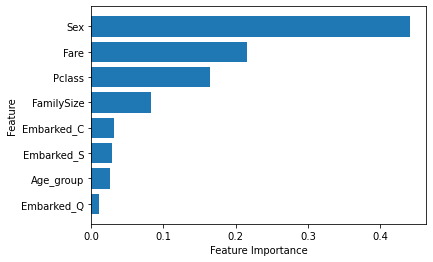

In [28]:
# Feature Importance

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")